In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
d2024 = pd.read_csv("pppub24.csv")
d2023 = pd.read_csv("pppub23.csv")
d2022 = pd.read_csv("pppub22.csv")
d2021 = pd.read_csv("pppub21.csv")

data = pd.concat([d2024, d2023, d2022, d2021], ignore_index=True)
data = data.sample(frac=0.1, random_state=42)

rfe_features100 = data[['HHDFMX', 'POTHVAL', 'RESNSS1', 'RESNSS2', 'RESNSSI1', 'RESNSSI2', 'RETCB_VAL', 'RETCB_YN', 'RINT_SC1', 'RINT_SC2', 'RINT_VAL1', 'RINT_VAL2', 'RINT_YN', 'RNT_VAL', 'RNT_YN', 'SRVS_VAL', 'SS_VAL', 'SS_YN', 'SSI_VAL', 'SSI_YN', 'STRKUC', 'SUBUC', 'SUR_SC1', 'SUR_SC2', 'SUR_VAL1', 'SUR_VAL2', 'SUR_YN', 'TRDINT_VAL', 'TSURVAL1', 'TSURVAL2', 'UC_VAL', 'UC_YN', 'VET_QVA', 'VET_TYP1', 'VET_TYP2', 'VET_TYP3', 'VET_TYP4', 'VET_TYP5', 'VET_VAL', 'VET_YN', 'WC_TYPE', 'WC_VAL', 'WC_YN', 'PAW_MON', 'PAW_TYP', 'PAW_VAL', 'PAW_YN', 'PENINCL', 'PENPLAN', 'WICYN', 'CHCARE_YN', 'CHELSEW_YN', 'CHSP_VAL', 'CHSP_YN', 'CSP_VAL', 'CSP_YN', 'ACTC_CRD', 'CTC_CRD', 'DEP_STAT', 'EIT_CRED', 'FEDTAX_AC', 'FEDTAX_BC', 'FICA', 'FILESTAT', 'MARG_TAX', 'PRSWKXPNS', 'STATETAX_A', 'STATETAX_B', 'PERLIS', 'POV_UNIV', 'COV', 'COV_CYR', 'COV_MULT_CYR', 'NOCOV_CYR', 'NOW_COV', 'NOW_PUB', 'PUB', 'PUB_CYR', 'NOW_DEPPRIV', 'NOW_OUTPRIV', 'NOW_OWNPRIV', 'NOW_PRIV', 'OUTPRIV', 'OWNPRIV', 'PRIV', 'PRIV_CYR', 'DEPGRP', 'GRPFTYP', 'GRPFTYP2', 'MRK', 'NOW_CAID', 'NOW_PCHIP', 'NOW_MCARE', 'NOW_IHSFLG', 'NOW_VACARE', 'PECOULD', 'ESIOFFER']]
rfe_features50 = data[['CHCARE_YN', 'CHELSEW_YN', 'CHSP_VAL', 'CHSP_YN', 'CSP_VAL', 'CSP_YN', 'ACTC_CRD', 'CTC_CRD', 'DEP_STAT', 'EIT_CRED', 'FEDTAX_AC', 'FEDTAX_BC', 'FICA', 'FILESTAT', 'MARG_TAX', 'PRSWKXPNS', 'STATETAX_A', 'STATETAX_B', 'PERLIS', 'POV_UNIV', 'COV', 'COV_CYR', 'COV_MULT_CYR', 'NOCOV_CYR', 'NOW_COV', 'NOW_PUB', 'PUB', 'DEPPRIV', 'NOW_DEPPRIV', 'NOW_OUTPRIV', 'NOW_OWNPRIV', 'NOW_PRIV', 'OUTPRIV', 'OWNPRIV', 'PRIV', 'PRIV_CYR', 'GRP', 'GRPFTYP', 'GRPFTYP2', 'NOW_MCAID', 'NOW_CAID', 'NOW_PCHIP', 'NOW_MCARE', 'NOW_IHSFLG', 'ESICOULD']]
rfe_features20 = data[['CSP_VAL', 'CSP_YN', 'FEDTAX_AC', 'FEDTAX_BC', 'FICA', 'FILESTAT', 'PRSWKXPNS', 'STATETAX_A', 'STATETAX_B', 'PERLIS', 'COV_MULT_CYR', 'DEPPRIV', 'NOW_OWNPRIV', 'OWNPRIV', 'GRPFTYP2', 'NOW_MCARE']]

In [4]:
X = rfe_features100
y = data['PTOT_R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9033020163727268

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3699
           1       1.00      0.99      0.99      2477
           2       0.88      0.93      0.90       274
           3       0.93      0.92      0.92       325
           4       0.91      0.90      0.91       322
           5       0.94      0.94      0.94       556
           6       0.93      0.91      0.92       395
           7       0.91      0.90      0.91       491
           8       0.90      0.86      0.88       354
           9       0.90      0.93      0.91       505
          10       0.81      0.85      0.83       356
          11       0.89      0.86      0.87       508
          12       0.80      0.76      0.78       295
          13       0.89      0.90      0.89       535
          14       0.83      0.77      0.80       215
          15       0.83      0.84      0.83       434
          16       0.69     

<Figure size 2000x800 with 0 Axes>

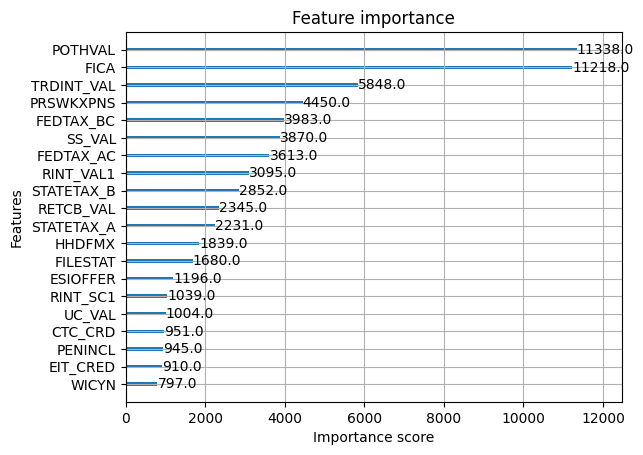

In [4]:
plt.figure(figsize=(20, 8))
plot_importance(xgb, max_num_features=20, importance_type='weight')
plt.show()